<span style="color:#8000C0"><tt><b> Version 1.30 - 2024, October, 6 <br>
Project : SysTherLin (Systèmes thermiques linéaires)<br>
Copyright (Eric Ducasse 2018)<br>
Licensed under the EUPL-1.2 or later<br>
Institution : ENSAM / I2M </b></tt></span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

* Pour pouvoir importer les classes du code SysTherLin :

In [2]:
import os,sys
rel_sys_ther_lin_path = ".." # Chemin relatif du dossier SysTherLin
abs_sys_ther_lin_path = os.path.abspath(rel_sys_ther_lin_path)
sys.path.append(abs_sys_ther_lin_path)

* Importation des classes du code SysTherLin :

In [3]:
try :
    from Couches_conductrices import (CoucheConductriceCylindrique, 
                                      CoucheConductriceSpherique,
                                      CoucheConductrice, Multicouche)
    from Systemes_thermiques_lineaires import (Cavite, SystemeThermiqueLineaire)
except Exception as err :
    print(f"Erreur : '{err}'")
    raise ValueError(f"Dossier '{abs_sys_ther_lin_path}' incorrect")

# <span style="color:#C00000;font-size:22px;font-weight:bold">EXEMPLE N°2 : TUBE CONTENANT DE L'EAU DANS UNE CAVITÉ SPHÉRIQUE</span>

## <span style="color:#008000;font-size:20px;font-weight:bold">Étape 1 : Définition des couches conductrices</span>

* Température initiale commune ici à tous les éléments

In [4]:
T0 = 65.0 # °C

## <span style="color:#A000A0;font-size:18px">1.1 $-$ Couches sphériques de la cloche</span>

In [5]:
inox1 = CoucheConductriceSpherique(16.5, 8000.0, 500.0, 0.150, 0.152, T0)
print(inox1)

Couche conductrice sphérique de paramètres :
	Conductivité : 16.50 W/K/m
	Masse volumique : 8000.00 kg/m³
	Capacité calorique : 500.00 J/K/kg
	Épaisseur : 2.00 mm
	Rayon intérieur : 150.00 mm
	Rayon extérieur : 152.00 mm
	Constante de temps : 0.48 s
	Température initiale : 65.00 °C


In [6]:
pstyr = CoucheConductriceSpherique(0.04, 18.0, 1450.0, 0.152, 0.157, T0)
print(pstyr)

Couche conductrice sphérique de paramètres :
	Conductivité : 0.04 W/K/m
	Masse volumique : 18.00 kg/m³
	Capacité calorique : 1450.00 J/K/kg
	Épaisseur : 5.00 mm
	Rayon intérieur : 152.00 mm
	Rayon extérieur : 157.00 mm
	Constante de temps : 7.98 s
	Température initiale : 65.00 °C


In [7]:
inox2 = CoucheConductriceSpherique(16.5, 8000.0, 500.0, 0.157, 0.159, T0)
print(inox2)

Couche conductrice sphérique de paramètres :
	Conductivité : 16.50 W/K/m
	Masse volumique : 8000.00 kg/m³
	Capacité calorique : 500.00 J/K/kg
	Épaisseur : 2.00 mm
	Rayon intérieur : 157.00 mm
	Rayon extérieur : 159.00 mm
	Constante de temps : 0.48 s
	Température initiale : 65.00 °C


## <span style="color:#A000A0;font-size:18px">1.2 $-$ Couches cylindriques du tube</span>

In [8]:
pp1 = CoucheConductriceCylindrique(0.22, 910.0, 1800.0, 25.0e-3, 26.5e-3, T0)
print(pp1)

Couche conductrice cylindrique de paramètres :
	Conductivité : 0.22 W/K/m
	Masse volumique : 910.00 kg/m³
	Capacité calorique : 1800.00 J/K/kg
	Épaisseur : 1.50 mm
	Rayon intérieur : 25.00 mm
	Rayon extérieur : 26.50 mm
	Constante de temps : 8.21 s
	Température initiale : 65.00 °C


In [9]:
air = CoucheConductriceCylindrique(0.026, 1.2, 1000.0, 26.5e-3, 28.5e-3, T0)
print(air)

Couche conductrice cylindrique de paramètres :
	Conductivité : 0.03 W/K/m
	Masse volumique : 1.20 kg/m³
	Capacité calorique : 1000.00 J/K/kg
	Épaisseur : 2.00 mm
	Rayon intérieur : 26.50 mm
	Rayon extérieur : 28.50 mm
	Constante de temps : 0.09 s
	Température initiale : 65.00 °C


In [10]:
pp2 = CoucheConductriceCylindrique(0.22, 910.0, 1800.0, 28.5e-3, 30.0e-3, T0)
print(pp2)

Couche conductrice cylindrique de paramètres :
	Conductivité : 0.22 W/K/m
	Masse volumique : 910.00 kg/m³
	Capacité calorique : 1800.00 J/K/kg
	Épaisseur : 1.50 mm
	Rayon intérieur : 28.50 mm
	Rayon extérieur : 30.00 mm
	Constante de temps : 8.23 s
	Température initiale : 65.00 °C


## <span style="color:#A000A0;font-size:18px">1.3 $-$ Couches planes du socle</span>

In [11]:
inox_socle_inf = CoucheConductrice(16.5, 8000.0, 500.0, 2e-3, T0)
print(inox_socle_inf)

Couche conductrice de paramètres :
	Conductivité : 16.50 W/K/m
	Masse volumique : 8000.00 kg/m³
	Capacité calorique : 500.00 J/K/kg
	Épaisseur : 2.00 mm
	Constante de temps : 0.48 s
	Température initiale : 65.00 °C


In [12]:
polystyrene_socle = CoucheConductrice(0.04, 18.0, 1450.0, 10e-3, T0)
print(polystyrene_socle)

Couche conductrice de paramètres :
	Conductivité : 0.04 W/K/m
	Masse volumique : 18.00 kg/m³
	Capacité calorique : 1450.00 J/K/kg
	Épaisseur : 10.00 mm
	Constante de temps : 32.62 s
	Température initiale : 65.00 °C


In [13]:
inox_socle_sup = CoucheConductrice(16.5, 8000.0, 500.0, 2e-3, T0)
print(inox_socle_sup)

Couche conductrice de paramètres :
	Conductivité : 16.50 W/K/m
	Masse volumique : 8000.00 kg/m³
	Capacité calorique : 500.00 J/K/kg
	Épaisseur : 2.00 mm
	Constante de temps : 0.48 s
	Température initiale : 65.00 °C


## <span style="color:#008000;font-size:20px;font-weight:bold">Étape 2 : Définition des multicouches avec conditions aux bords</span>

## <span style="color:#A000A0;font-size:18px">2.1 $-$ Cloche hémisphérique</span>

In [14]:
coque = Multicouche([inox1, pstyr, inox2])
coque.definir_CL("G", "Convection", 10.0) # Côté intérieur
coque.definir_CL("D", "Convection", 10.0) # Côté extérieur
print(coque)

Multicouche à 3 couche(s) conductrice(s) sphérique(s)
	d'épaisseur(s) en millimètres : [2.0, 5.0, 2.0]
	Condition limite à gauche : "Convection"
	Condition limite à droite : "Convection"


## <span style="color:#A000A0;font-size:18px">2.2 $-$ Tube cylindrique</span>

In [15]:
tube = Multicouche([pp1, air, pp2])
tube.definir_CL("G", "Convection", 200.0) # Côté intérieur
tube.definir_CL("D", "Convection", 10.0) # Côté extérieur
print(tube)

Multicouche à 3 couche(s) conductrice(s) cylindrique(s)
	d'épaisseur(s) en millimètres : [1.5, 2.0, 1.5]
	Condition limite à gauche : "Convection"
	Condition limite à droite : "Convection"


## <span style="color:#A000A0;font-size:18px">2.3 $-$ Plateau plan</span>

In [16]:
socle = Multicouche([inox_socle_inf, polystyrene_socle, inox_socle_sup])
socle.definir_CL("G", "Convection", 10.0) # Côté inférieur
socle.definir_CL("D", "Convection", 10.0) # Côté supérieur
print(socle)

Multicouche à 3 couche(s) conductrice(s) 
	d'épaisseur(s) en millimètres : [2.0, 10.0, 2.0]
	Condition limite à gauche : "Convection"
	Condition limite à droite : "Convection"


## <span style="color:#008000;font-size:20px;font-weight:bold">Étape 3 : Définition des cavités</span>

## <span style="color:#A000A0;font-size:18px">3.1 $-$ Caractéristiques géométriques</span>

* Hauteur du tube cylindrique [m]

In [17]:
H_tube = 0.12

* Surface intérieure du tube [m²] (<tt>tube.X[0]</tt> est le rayon intérieur)

In [18]:
S_tube_int = (2*np.pi*tube.X[0]) * H_tube
round(S_tube_int, 4)

0.0188

* Surface extérieure du tube [m²] (<tt>tube.X[-1]</tt> est le rayon extérieur)

In [19]:
S_tube_ext = (2*np.pi*tube.X[-1]) * H_tube
round(S_tube_ext, 4)

0.0226

* Volume d'eau contenu par le tube [m³]

In [20]:
V_eau = (np.pi*tube.X[0]**2) * H_tube
round(V_eau, 6)

0.000236

* Volume occupé par le tube [m³]

In [21]:
V_tube = (np.pi*tube.X[-1]**2) * H_tube
round(V_tube, 6)

0.000339

* Volume d'air contenu dans la coque, autour du tube [m³]

In [22]:
V_air = (2/3*np.pi*coque.X[0]**3) - V_tube
round(V_air, 6)

0.006729

## <span style="color:#A000A0;font-size:18px">3.2 $-$ Cavité d'eau</span>

In [23]:
eau = Cavite(V_tube, 1000.0, 4200.0,[[tube, "G", S_tube_int]], T0)
print(eau)

Cavité à une seule paroi :
	Volume : 339.29 cm³
	Masse volumique : 1000.00 kg/m^3
	Capacité calorique : 4200.00 J/K/kg
	Température initiale : 65.00 °C
	Surface de la paroi n°1 : 188.50 cm²


## <span style="color:#A000A0;font-size:18px">3.3 $-$ Cavité d'air</span>

In [24]:
air = Cavite(V_air, 1.2, 1000.0,[ [coque, "G", 2*np.pi*coque.X[0]**2],
                                  [socle, "D", np.pi*(coque.X[0]**2-tube.X[-1]**2)],
                                  [tube, "D", S_tube_ext]
                                ], T0)
print(air)

Cavité à 3 parois :
	Volume : 6.73 l
	Masse volumique : 1.20 kg/m^3
	Capacité calorique : 1000.00 J/K/kg
	Température initiale : 65.00 °C
	Surface de la paroi n°1 : 0.141 m²
	Surface de la paroi n°2 : 678.58 cm²
	Surface de la paroi n°3 : 226.19 cm²


## <span style="color:#008000;font-size:20px;font-weight:bold">Étape 4 : Définition du système global</span>

On spécifie ici la durée et la période d'échantillonnage

In [25]:
systeme = SystemeThermiqueLineaire(2*3600, 1.0, [air,eau])

## <span style="color:#008000;font-size:20px;font-weight:bold">Étape 5 : Définition des signaux imposés et calcul de la solution</span>

## <span style="color:#A000A0;font-size:18px">Il n'y a ici que la température de l'air extérieur à définir</span>

* Une constante de 10.0°C donne une transformée de Laplace $\displaystyle s\mapsto \frac{10.0}{s}$

* Côté extérieur du socle

In [26]:
socle.definir_signal("G", lambda s : 10.0/s)

* Côté extérieur de la cloche

In [27]:
coque.definir_signal("D", lambda s : 10.0/s)

## <span style="color:#A000A0;font-size:18px">Calcul de la solution</span>

In [28]:
systeme.calculer_maintenant()

SystemeThermiqueLineaire.calculer_maintenant...
Sauts de températures dans le multicouche 1
Sauts de températures dans le multicouche 2
Sauts de températures dans le multicouche 3
... Calcul effectué.


## <span style="color:#008000;font-size:20px;font-weight:bold">Étape 6 : Visualisation des résultats</span>

* Instants en minutes pour le tracé des courbes

In [29]:
tmn = systeme.timeValues/60.0

* Tracé des températures

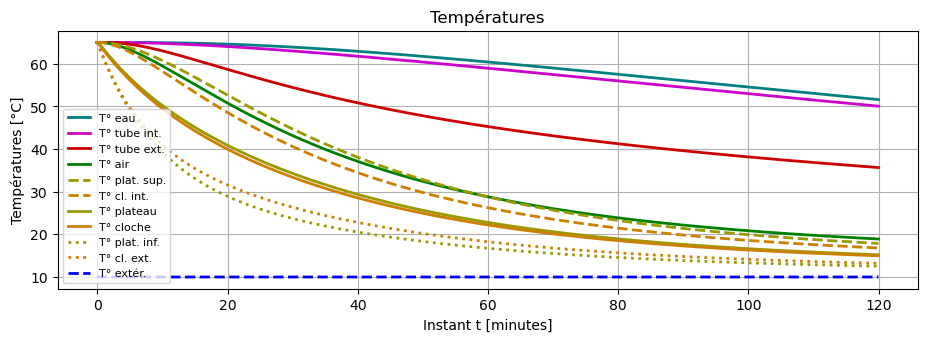

In [30]:
fig_T = plt.figure(figsize=(10.0,3.0))
ax_T = fig_T.subplots(1,1)
plt.subplots_adjust(left=0.07, right=0.93, bottom=0.07, top=0.93, wspace=0.4, hspace=0.3)
ax_T.set_title("Températures")
ax_T.set_xlabel("Instant t [minutes]")
# Température de l'eau dans le tube
T_eau = systeme.T_cavites[1]
ax_T.plot(tmn, T_eau, "-", color=(0,0.5,0.5), linewidth=2.0,
          label = "T° eau")
# Températures dans le tube
_,T_tube_int,_ = tube.T_phi(0.5*(tube.X[0]+tube.X[1]))
ax_T.plot(tmn, T_tube_int, "-", color=(0.8,0,0.8), linewidth=2.0,
          label = "T° tube int.")
_,T_tube_ext,_ = tube.T_phi(0.5*(tube.X[2]+tube.X[3]))
ax_T.plot(tmn, T_tube_ext, "-", color=(0.8,0,0), linewidth=2.0,
          label = "T° tube ext.")
# Température de l'air sour la cloche
T_air = systeme.T_cavites[0]
ax_T.plot(tmn, T_air, "-", color=(0,0.5,0), linewidth=2.0,
          label = "T° air")
# Température sur la paroi supérieure du socle
_,T_socle_sup,_ = socle.T_phi(socle.X[-1])
ax_T.plot(tmn, T_socle_sup, "--", color=(0.6,0.6,0), linewidth=2.0,
          label = "T° plat. sup.")
# Température sur la paroi intérieure de la coque
_,T_coque_int,_ = coque.T_phi(coque.X[0])
ax_T.plot(tmn, T_coque_int, "--", color=(0.8,0.5,0), linewidth=2.0,
          label = "T° cl. int.")
# Température dans le socle (milieu du polystyrène)
_,T_socle,_ = socle.T_phi(0.5*(socle.X[0]+socle.X[-1]))
ax_T.plot(tmn, T_socle, "-", color=(0.6,0.6,0), linewidth=2.0,
          label = "T° plateau")
# Température dans la coque (milieu du polystyrène)
_,T_coque,_ = coque.T_phi(0.5*(coque.X[0]+coque.X[-1]))
ax_T.plot(tmn, T_coque, "-", color=(0.8,0.5,0), linewidth=2.0,
          label = "T° cloche")
# Température sur la paroi inférieure du socle
_,T_socle_inf,_ = socle.T_phi(socle.X[0])
ax_T.plot(tmn, T_socle_inf, ":", color=(0.6,0.6,0), linewidth=2.0,
          label = "T° plat. inf.")
# Température sur la paroi extérieure de la coque
_,T_coque_ext,_ = coque.T_phi(coque.X[-1])
ax_T.plot(tmn, T_coque_ext, ":", color=(0.8,0.5,0), linewidth=2.0,
          label = "T° cl. ext.")
# Température extérieure
ax_T.plot(tmn, 10.0*np.ones_like(tmn), "--", color=(0,0,1.0), linewidth=2.0,
          label = "T° extér.")
# Finalisation du tracé
ax_T.set_ylabel("Températures [°C]")
ax_T.grid() ; ax_T.legend(loc="lower left", fontsize=8) ;

* Tracé des densités surfaciques de flux de puissance calorifique

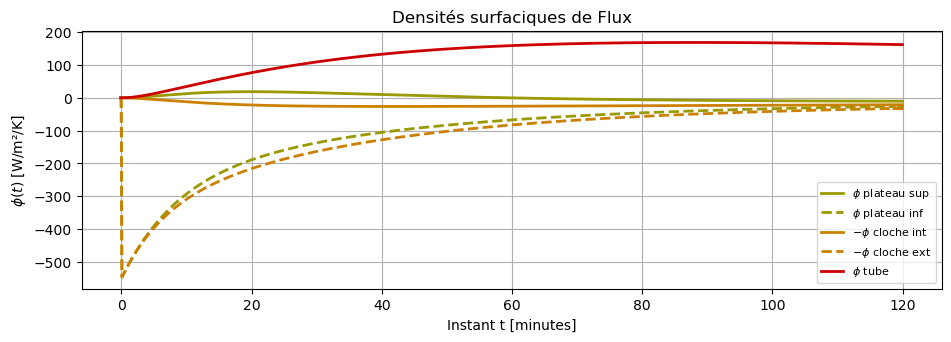

In [31]:
fig_phi = plt.figure(figsize=(10.0,3.0))
ax_phi = fig_phi.subplots(1,1)
plt.subplots_adjust(left=0.07, right=0.93, bottom=0.07, top=0.93, wspace=0.4, hspace=0.3)
ax_phi.set_xlabel("Instant t [minutes]")
ax_phi.set_title("Densités surfaciques de Flux")
_,_,phi_socle_sup = socle.T_phi(socle.X[-1])
ax_phi.plot(tmn, phi_socle_sup, "-", color=(0.6,0.6,0), linewidth=2.0,
            label = r"$\phi$ plateau sup")
_,_,phi_socle_inf = socle.T_phi(socle.X[0])
ax_phi.plot(tmn, phi_socle_inf, "--", color=(0.6,0.6,0),
            linewidth=2.0, label = r"$\phi$ plateau inf")
_,_,phi_coque_int = coque.T_phi(coque.X[0])
ax_phi.plot(tmn, -phi_coque_int, "-", color=(0.8,0.5,0),
            linewidth=2.0, label = r"$-\phi$ cloche int")
_,_,phi_coque_ext = coque.T_phi(coque.X[-1])
ax_phi.plot(tmn, -phi_coque_ext, "--", color=(0.8,0.5,0),
            linewidth=2.0, label = r"$-\phi$ cloche ext")
_,_,phi_tube = tube.T_phi(tube.X[-1])
ax_phi.plot(tmn, phi_tube, "-", color=(0.8,0,0), linewidth=2.0,
            label = r"$\phi$ tube")
ax_phi.grid() ; ax_phi.legend(loc="best", fontsize=8)
ax_phi.set_ylabel(r"$\phi(t)$ [W/m²/K]") ;